In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn
import itertools

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow_addons.optimizers import CyclicalLearningRate

mpl.style.use('seaborn')

ModuleNotFoundError: ignored

In [ ]:
from src.se_resnet_models import SE_Resnet_34, SE_Resnet_18
from src.resnet_models import Resnet_18, Resnet_34
from src.preprocessing import signal_clean
from src.modeling_results import plot_roc_curve, plot_confusion_matrix, get_eval_by_threshold, acc_graph, loss_graph

importing Jupyter notebook from _SE_ResNet_models.ipynb
importing Jupyter notebook from _ResNet_models.ipynb
importing Jupyter notebook from _preprocessing.ipynb
importing Jupyter notebook from _getModelingResults.ipynb


In [3]:
afib_df = pd.read_csv('./data/train_afib_notFiltered_aug.csv')
non_afib_df = pd.read_csv('./data/train_nonafib_notFiltered_aug.csv')
df = pd.concat([afib_df, non_afib_df]).reset_index(drop=True)

test_afib_df = pd.read_csv('./data/test_afib_notFiltered_aug.csv')
test_non_afib_df = pd.read_csv('./data/test_nonafib_notFiltered_aug.csv')
test_df = pd.concat([test_afib_df, test_non_afib_df]).reset_index(drop=True)

In [ ]:
df_X = df.drop(['label'],axis=1).values
df_Y = df['label'].values

test_X = test_df.drop(['label'],axis=1).values
test_Y = test_df['label'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df_X_cleaned = signal_clean(df_X, sampling_rate=125)
df_X_cleaned = pd.DataFrame(df_X_cleaned).T
df_X_processed = pd.DataFrame(std_scaler.fit_transform(df_X_cleaned)).T

test_X_cleaned = signal_clean(test_X, sampling_rate=125)
test_X_cleaned = pd.DataFrame(test_X_cleaned).T
test_X = pd.DataFrame(std_scaler.fit_transform(test_X_cleaned)).T

X_train, X_val, y_train, y_val = train_test_split(df_X_processed, df_Y, test_size=0.25, random_state=3)

### ResNet18

In [ ]:
ResNet18 = Resnet_18(input_shape = (1250,1))

N = X_train.shape[0]
batch_size = 16
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath='./models/Resnet_18_smallBatch.hdf5',save_best_only=True, monitor='val_loss')
ResNet18.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = ResNet18.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, batch_size=batch_size, epochs=100, callbacks=[save_best_weights])

ResNet18.save("./models/Resnet_18_smallBatch.h5") 

Epoch 1/100
363/363 [==============================] - 48s 35ms/step - loss: 0.6209 - accuracy: 0.6748 - val_loss: 1.4477 - val_accuracy: 0.4990
Epoch 2/100
363/363 [==============================] - 9s 25ms/step - loss: 0.4527 - accuracy: 0.7982 - val_loss: 0.4584 - val_accuracy: 0.8061
Epoch 3/100
363/363 [==============================] - 12s 32ms/step - loss: 0.3746 - accuracy: 0.8419 - val_loss: 0.3511 - val_accuracy: 0.8707
Epoch 4/100
363/363 [==============================] - 9s 24ms/step - loss: 0.3142 - accuracy: 0.8722 - val_loss: 0.3418 - val_accuracy: 0.8676
Epoch 5/100
363/363 [==============================] - 8s 22ms/step - loss: 0.3034 - accuracy: 0.8707 - val_loss: 0.3473 - val_accuracy: 0.8625
Epoch 6/100
363/363 [==============================] - 11s 29ms/step - loss: 0.3335 - accuracy: 0.8648 - val_loss: 0.3264 - val_accuracy: 0.8645
Epoch 7/100
363/363 [==============================] - 9s 25ms/step - loss: 0.3209 - accuracy: 0.8670 - val_loss: 0.3540 - val_accura

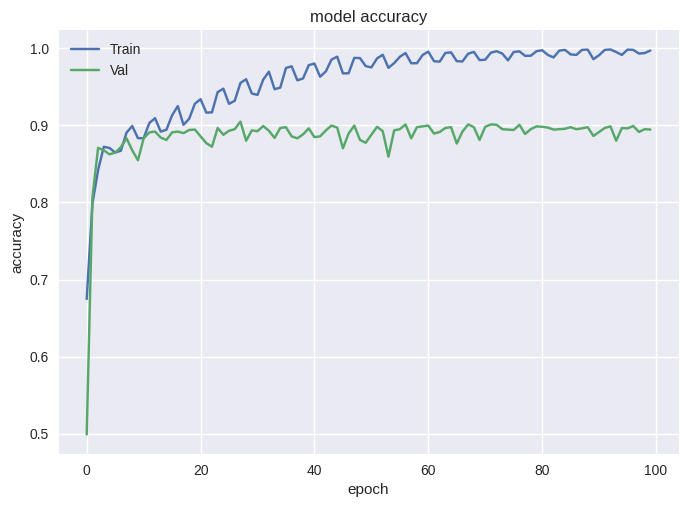

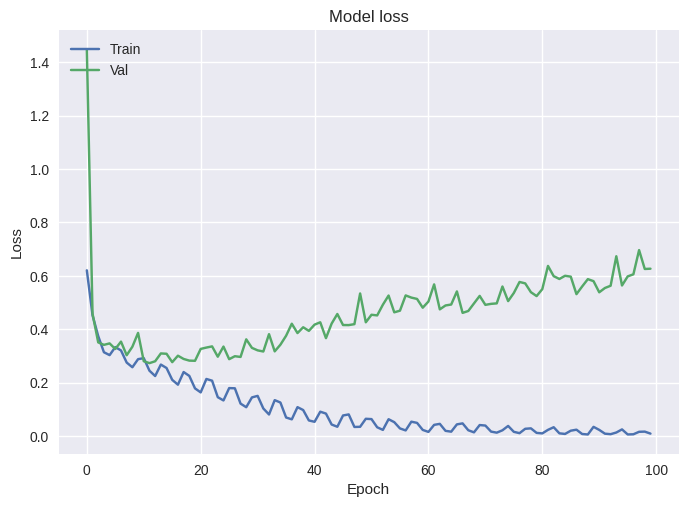

In [ ]:
acc_graph(history)
loss_graph(history)

### ResNet34

In [ ]:
ResNet34 = Resnet_34(input_shape = (1250,1))

N = X_train.shape[0]
batch_size = 16
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath='./models/Resnet_34_smallBatch.hdf5',save_best_only=True, monitor='val_loss')
ResNet34.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = ResNet34.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, batch_size=batch_size, epochs=100, callbacks=[save_best_weights])

ResNet34.save("./models/Resnet_34_smallBatch.h5") 


Epoch 1/100
363/363 [==============================] - 41s 49ms/step - loss: 0.6282 - accuracy: 0.6737 - val_loss: 2.3457 - val_accuracy: 0.4990
Epoch 2/100
363/363 [==============================] - 17s 46ms/step - loss: 0.4677 - accuracy: 0.7819 - val_loss: 1.1550 - val_accuracy: 0.7590
Epoch 3/100
363/363 [==============================] - 16s 44ms/step - loss: 0.3848 - accuracy: 0.8419 - val_loss: 0.3202 - val_accuracy: 0.8625
Epoch 4/100
363/363 [==============================] - 15s 40ms/step - loss: 0.3267 - accuracy: 0.8691 - val_loss: 0.3616 - val_accuracy: 0.8563
Epoch 5/100
363/363 [==============================] - 15s 40ms/step - loss: 0.3208 - accuracy: 0.8720 - val_loss: 0.5121 - val_accuracy: 0.7725
Epoch 6/100
363/363 [==============================] - 15s 40ms/step - loss: 0.3476 - accuracy: 0.8539 - val_loss: 0.3446 - val_accuracy: 0.8775
Epoch 7/100
363/363 [==============================] - 14s 39ms/step - loss: 0.3300 - accuracy: 0.8643 - val_loss: 0.3879 - val_ac

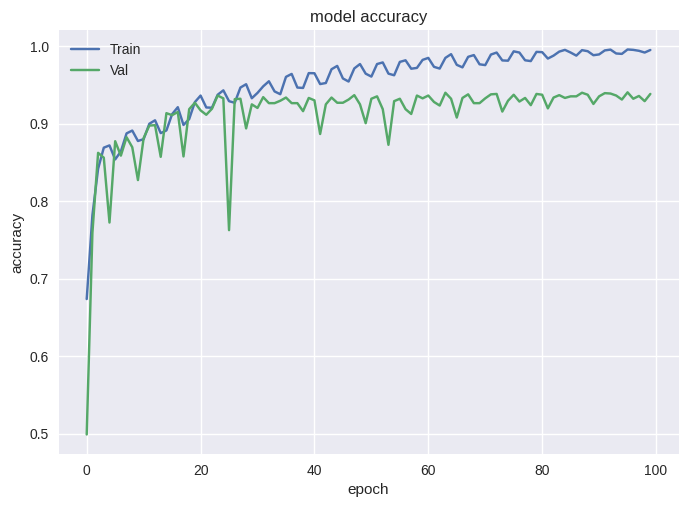

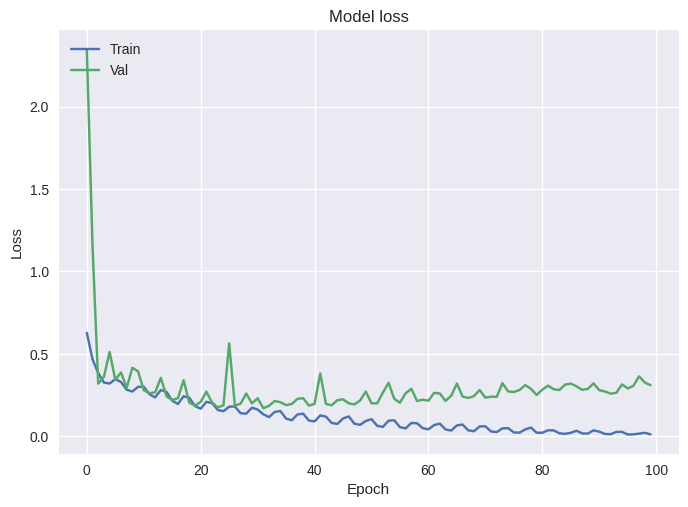

In [ ]:
acc_graph(history)
loss_graph(history)

### SE-ResNet-18

In [ ]:
SE_model_18 = SE_Resnet_18(input_shape = (1250,1))

N = X_train.shape[0]
batch_size = 16
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath='./models/SE_resnet_18_smallBatch.hdf5',save_best_only=True, monitor='val_loss')
SE_model_18.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = SE_model_18.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, batch_size=batch_size, epochs=100, callbacks=[save_best_weights])

SE_model_18.save("./models/SE_resnet_18_smallBatch.h5") 



Epoch 1/100
363/363 [==============================] - 29s 34ms/step - loss: 0.5768 - accuracy: 0.6984 - val_loss: 1.7085 - val_accuracy: 0.4990
Epoch 2/100
363/363 [==============================] - 12s 32ms/step - loss: 0.4559 - accuracy: 0.7981 - val_loss: 0.4891 - val_accuracy: 0.8289
Epoch 3/100
363/363 [==============================] - 14s 37ms/step - loss: 0.3917 - accuracy: 0.8314 - val_loss: 0.3379 - val_accuracy: 0.8723
Epoch 4/100
363/363 [==============================] - 11s 31ms/step - loss: 0.3268 - accuracy: 0.8696 - val_loss: 0.4051 - val_accuracy: 0.8454
Epoch 5/100
363/363 [==============================] - 12s 32ms/step - loss: 0.3106 - accuracy: 0.8769 - val_loss: 0.3376 - val_accuracy: 0.8697
Epoch 6/100
363/363 [==============================] - 10s 27ms/step - loss: 0.3339 - accuracy: 0.8622 - val_loss: 0.4416 - val_accuracy: 0.8314
Epoch 7/100
363/363 [==============================] - 11s 32ms/step - loss: 0.3143 - accuracy: 0.8750 - val_loss: 0.3196 - val_ac

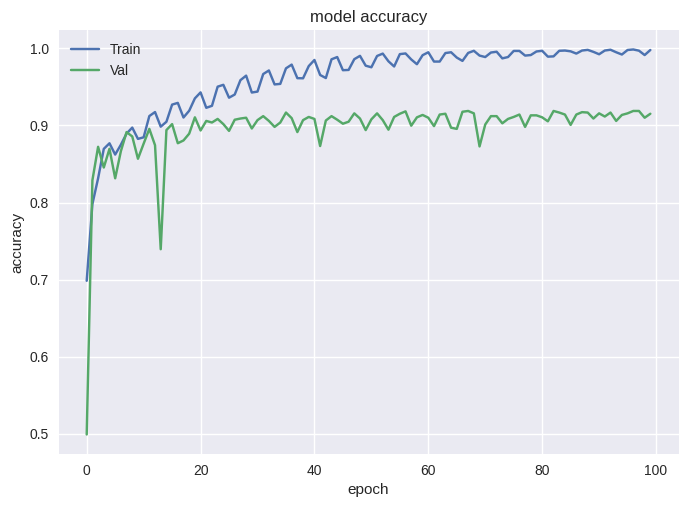

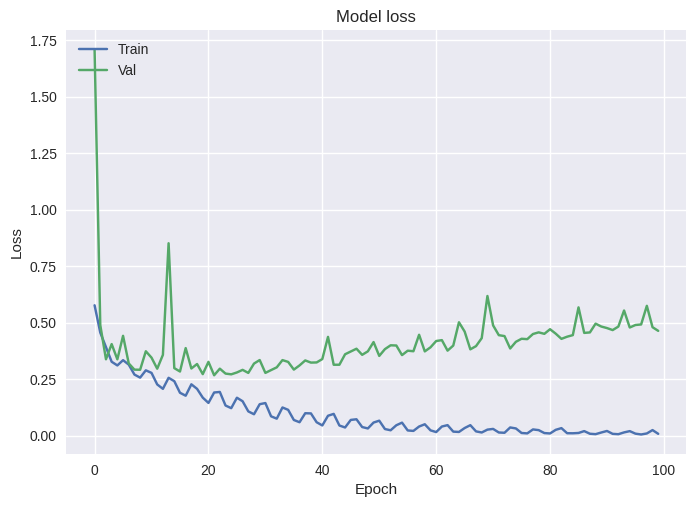

In [ ]:
acc_graph(history)
loss_graph(history)

### SE-ResNet-34

In [ ]:
SE_model_34 = SE_Resnet_34(input_shape = (1250,1))

N = X_train.shape[0]
batch_size = 16
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath='./models/SE_resnet_34_smallBatch.hdf5',save_best_only=True, monitor='val_loss')
SE_model_34.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = SE_model_34.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, batch_size=batch_size, epochs=100, callbacks=[save_best_weights])

SE_model_34.save("./models/SE_resnet_34_smallBatch.h5") 



In [ ]:
SE_model_34 = SE_Resnet_34(input_shape = (1250,1))

N = X_train.shape[0]
batch_size = 16
iterations = N/batch_size
step_size= 2 * iterations

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

save_best_weights = ModelCheckpoint(filepath='./models/SE_resnet_34_smallBatch.hdf5',save_best_only=True, monitor='val_loss')
SE_model_34.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = SE_model_34.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, batch_size=batch_size, epochs=100, callbacks=[save_best_weights])

SE_model_34.save("./models/SE_resnet_34_smallBatch.h5") 

Epoch 1/100
97/97 [==============================] - 47s 77ms/step - loss: 0.6280 - accuracy: 0.6510 - val_loss: 0.9498 - val_accuracy: 0.4997
Epoch 2/100
97/97 [==============================] - 5s 53ms/step - loss: 0.4231 - accuracy: 0.8151 - val_loss: 1.9521 - val_accuracy: 0.5003
Epoch 3/100
97/97 [==============================] - 5s 53ms/step - loss: 0.3418 - accuracy: 0.8560 - val_loss: 2.0162 - val_accuracy: 0.5016
Epoch 4/100
97/97 [==============================] - 7s 70ms/step - loss: 0.2678 - accuracy: 0.8920 - val_loss: 0.5900 - val_accuracy: 0.7065
Epoch 5/100
97/97 [==============================] - 6s 60ms/step - loss: 0.2477 - accuracy: 0.8991 - val_loss: 0.2973 - val_accuracy: 0.8707
Epoch 6/100
97/97 [==============================] - 5s 52ms/step - loss: 0.2571 - accuracy: 0.8978 - val_loss: 0.4816 - val_accuracy: 0.7990
Epoch 7/100
97/97 [==============================] - 5s 52ms/step - loss: 0.2387 - accuracy: 0.9033 - val_loss: 0.3076 - val_accuracy: 0.8966
Epoch

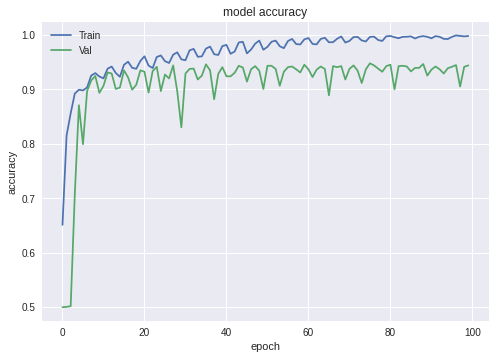

In [ ]:
acc_graph(history)

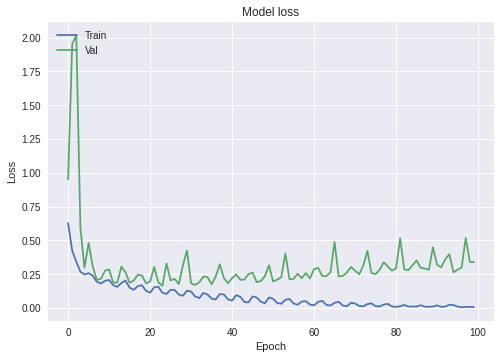

In [ ]:
loss_graph(history)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
model = SE_Resnet_34(input_shape = (1250,1))
model.load_weights('./models/SE_resnet_34_smallBatch.hdf5')

## roc curve 
test_target = test_Y
prob = model.predict(test_X)    
fper, tper, thresholds = roc_curve(test_target, prob)
print(metrics.auc(fper, tper))
plot_roc_curve(fper, tper)

## confusion matrix 

y_pred = (prob > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Afib', 'Afib'],
                      title='Confusion matrix')

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba = prob
resultByThreshold = get_eval_by_threshold(test_target, pred_proba.reshape(-1, 1), thresholds)

round(pd.DataFrame(resultByThreshold, columns = ['Accuracy', 'PPV', 'Sensitivity', 'Specificity', 'F1 score', 'Threshold']).set_index('Threshold').T, 4)


60/60 [==============================] - 2s 15ms/step


NameError: ignored

In [ ]:
model = SE_Resnet_34(input_shape = (1250,1))
model.load_weights('./models/SE_resnet_34_smallBatch.hdf5')

## roc curve 
test_target = test_Y
prob = model.predict(test_X)    
fper, tper, thresholds = roc_curve(test_target, prob)
print(metrics.auc(fper, tper))
plot_roc_curve(fper, tper)

## confusion matrix 

y_pred = (prob > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Afib', 'Afib'],
                      title='Confusion matrix')

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba = prob
resultByThreshold = get_eval_by_threshold(test_target, pred_proba.reshape(-1, 1), thresholds)

round(pd.DataFrame(resultByThreshold, columns = ['Accuracy', 'PPV', 'Sensitivity', 'Specificity', 'F1 score', 'Threshold']).set_index('Threshold').T, 4)


In [ ]:
model = SE_Resnet_18(input_shape = (1250,1))
model.load_weights('./models/SE_resnet_18_smallBatch.hdf5')

## roc curve 
test_target = test_Y
prob = model.predict(test_X)    
fper, tper, thresholds = roc_curve(test_target, prob)
print(metrics.auc(fper, tper))
plot_roc_curve(fper, tper)

## confusion matrix 

y_pred = (prob > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Afib', 'Afib'],
                      title='Confusion matrix')

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba = prob
resultByThreshold = get_eval_by_threshold(test_target, pred_proba.reshape(-1, 1), thresholds)

round(pd.DataFrame(resultByThreshold, columns = ['Accuracy', 'PPV', 'Sensitivity', 'Specificity', 'F1 score', 'Threshold']).set_index('Threshold').T, 4)


In [ ]:
model = Resnet_34(input_shape = (1250,1))
model.load_weights('./models/Resnet_34_smallBatch.hdf5')

## roc curve 
test_target = test_Y
prob = model.predict(test_X)    
fper, tper, thresholds = roc_curve(test_target, prob)
print(metrics.auc(fper, tper))
plot_roc_curve(fper, tper)

## confusion matrix 

y_pred = (prob > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Afib', 'Afib'],
                      title='Confusion matrix')

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba = prob
resultByThreshold = get_eval_by_threshold(test_target, pred_proba.reshape(-1, 1), thresholds)

round(pd.DataFrame(resultByThreshold, columns = ['Accuracy', 'PPV', 'Sensitivity', 'Specificity', 'F1 score', 'Threshold']).set_index('Threshold').T, 4)


In [ ]:
model = Resnet_18(input_shape = (1250,1))
model.load_weights('./models/Resnet_18_smallBatch.hdf5')

## roc curve 
test_target = test_Y
prob = model.predict(test_X)    
fper, tper, thresholds = roc_curve(test_target, prob)
print(metrics.auc(fper, tper))
plot_roc_curve(fper, tper)

## confusion matrix 

y_pred = (prob > 0.5).astype("int32")
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_target, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Afib', 'Afib'],
                      title='Confusion matrix')

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba = prob
resultByThreshold = get_eval_by_threshold(test_target, pred_proba.reshape(-1, 1), thresholds)

round(pd.DataFrame(resultByThreshold, columns = ['Accuracy', 'PPV', 'Sensitivity', 'Specificity', 'F1 score', 'Threshold']).set_index('Threshold').T, 4)
